## Matplot Evaluations for Processed Data
* Transcript/Chunk Length Distribution
* Distribution of Chunk Length
* Number of chunks per video
* Most Common Words or Topics per Chunk
* Embedding Visualization (for QA projects)
* 2D Visualization of Chunk Enbedding

## Import Libraries

In [2]:
%pip install matplotlib --quiet
%pip install wordcloud --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("../data/processed_cleaned_chunks.csv")
print(df.head())

  chunk_id  video_id                                            subject  \
0  chunk_0         1  An AI Agent that knows everything about your P...   
1  chunk_1         1  An AI Agent that knows everything about your P...   
2  chunk_2         1  An AI Agent that knows everything about your P...   
3  chunk_3         1  An AI Agent that knows everything about your P...   
4  chunk_4         1  An AI Agent that knows everything about your P...   

                                                text  
0  and to you where i plan to show you the greate...  
1  and issue and in those project youre going to ...  
2  project the project status report any issue th...  
3  be it would be crazy right it would take you f...  
4  person and asking him this question and asking...  


## Transcript/Chunk Length Distribution

In [17]:
print(df[['text']].head(10))

                                                text
0  and to you where i plan to show you the greate...
1  and issue and in those project youre going to ...
2  project the project status report any issue th...
3  be it would be crazy right it would take you f...
4  person and asking him this question and asking...
5  one that maybe consolidated to the project man...
6  is we need to bring back information and data ...
7  like the business case thats a great field of ...
8  got initial input variable i just dragged that...
9  field and again you can put more field in the ...


## Distribution of Chunk Length

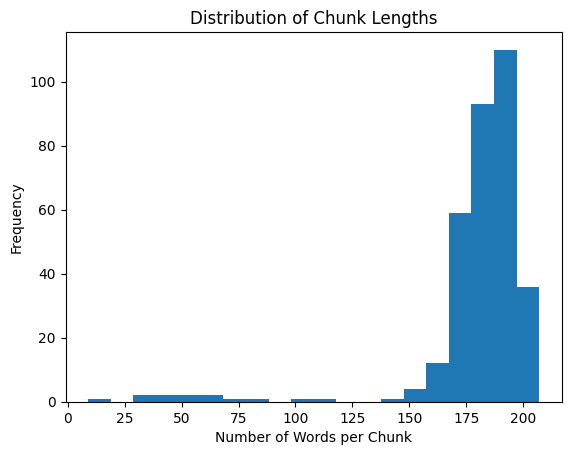

In [18]:
df['chunk_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.hist(df['chunk_length'], bins=20)
plt.title("Distribution of Chunk Lengths")
plt.xlabel("Number of Words per Chunk")
plt.ylabel("Frequency")
plt.show()

## Number of chunks per video

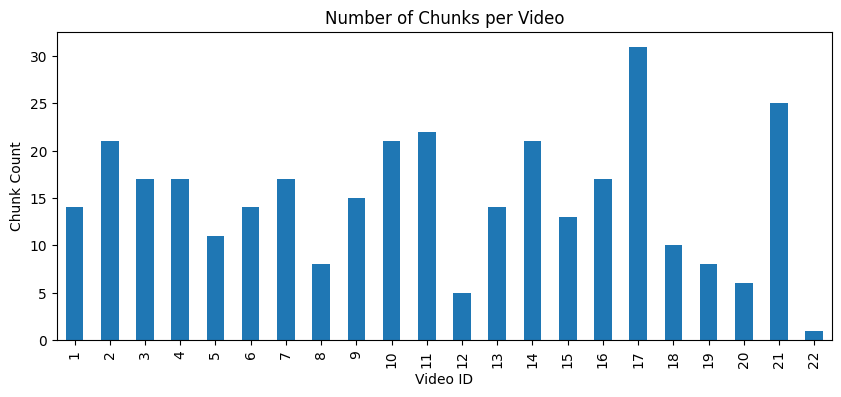

In [19]:
chunks_per_video = df.groupby('video_id').size()
chunks_per_video.plot(kind='bar', figsize=(10,4))
plt.title("Number of Chunks per Video")
plt.xlabel("Video ID")
plt.ylabel("Chunk Count")
plt.show()

## Most Common Words or Topics per Chunk

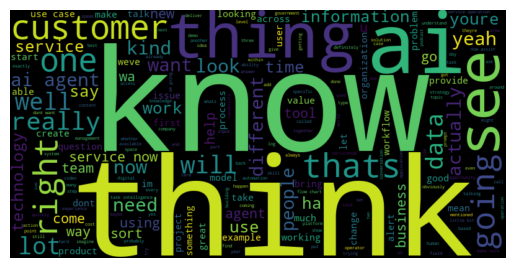

In [21]:
text = " ".join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Embedding Visualization (for QA projects)

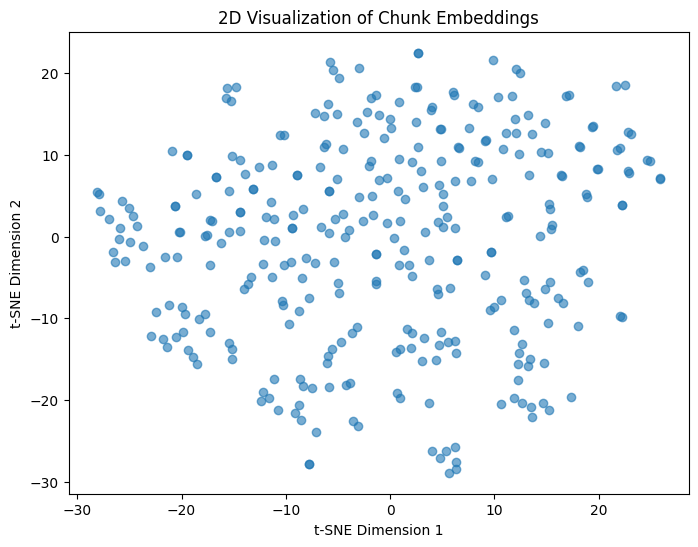

In [32]:
model = SentenceTransformer('all-MiniLM-L6-v2')
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)
plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], alpha=0.6)
plt.title("2D Visualization of Chunk Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## 2D Visualization of Chunk Enbedding

Note: you may need to restart the kernel to use updated packages.


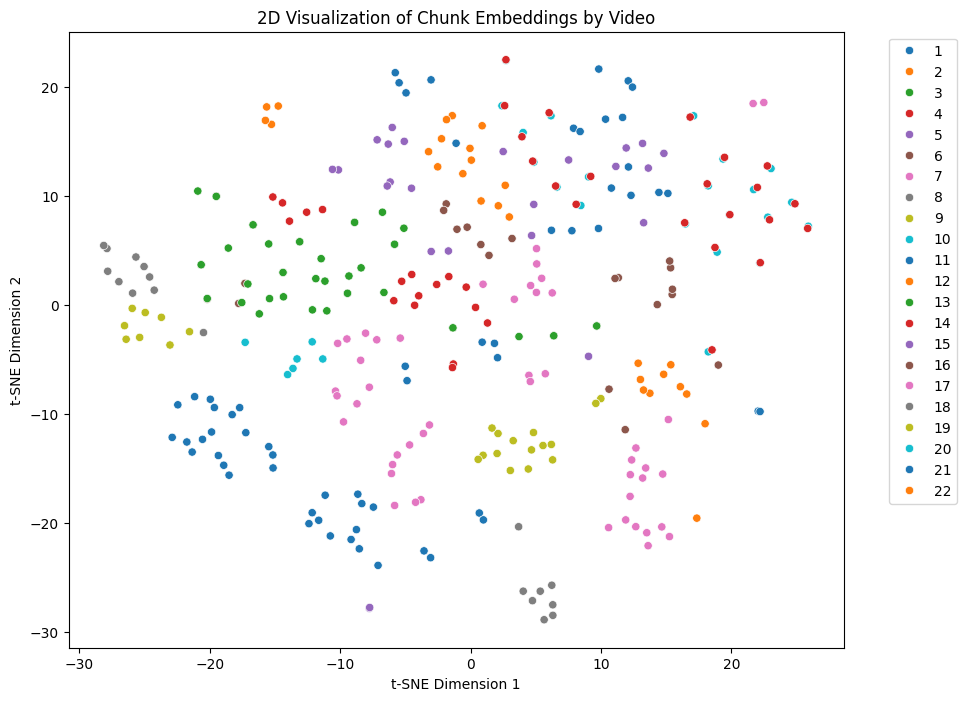

In [30]:
%pip install seaborn --quiet

import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hue=df['video_id'], palette='tab10')
plt.title("2D Visualization of Chunk Embeddings by Video")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()